# Group Challenge 4: Cell Tracking 

Create a plugin to track cells. The plugin should enable users to:

1) Select an image layer
2) Load a config file
3) Select additional image features
4) Display tracks and labels interactively in the napari viewer

- Watch [this demo video](https://youtu.be/Lg6Cj1TSljI) to see the plugin in action

### Segment cells with Cellpose

To track cells, you must first obtain an instance segmentation of the selected image. Here, you should use Cellpose to segment the cells in the sample dataset (see Practical 2). Note that you will have to extend the segmentation function to run on 2D+time data.

### Track cells with btrack

To obtain tracks, you should use the [btrack package](https://btrack.readthedocs.io/en/stable/index.html).

- [Example of how to use btrack](https://btrack.readthedocs.io/en/stable/user_guide/simple_example.html)

### Create a file dialog window

To enable users to select a config file, you should use a `FileEdit` widget. You can find the config file "cell_config.json" in the "GroupChallenges" folder

- [Documentation for `FileEdit` widget](https://pyapp-kit.github.io/magicgui/api/widgets/FileEdit/)

### Adding tracks as a `Tracks` layer

To add the tracking data to the napari viewer, you should take advantage of `napari.layers.Tracks`.

- [Documentation for `napari.layers.Tracks`](https://napari.org/0.5.6/api/napari.layers.Tracks.html)

### Using `thread_worker` to avoid freezing

Segmenting the cells in the sample dataset will not be instantaneous. To stop the napari viewer from freezing, make use of the `@thread_worker` decorator (see Practical 2).

## Load sample data

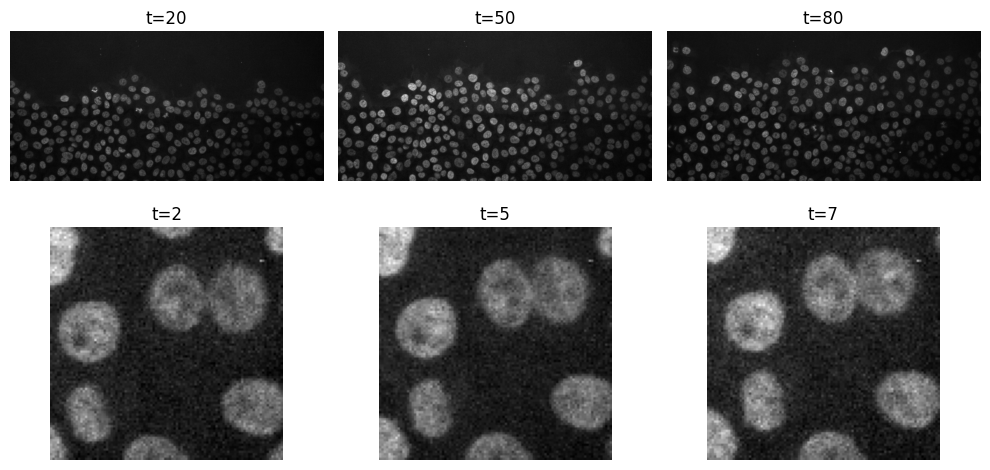

In [11]:
from skimage.io import imread
import matplotlib.pyplot as plt

IMAGE = imread('https://zenodo.org/records/5206107/files/P31-crop.tif?download=1')
IMAGE_CROP = IMAGE[10:20,-100:,-100:]

fig, ax = plt.subplots(2, 3, figsize=(10,5))
for i, img in enumerate([IMAGE, IMAGE_CROP]):
    ax[i,0].imshow(img[20] if i==0 else img[2], cmap='gray')
    ax[i,0].axis('off')
    ax[i,0].set_title('t=20' if i==0 else 't=2')
    ax[i,1].imshow(img[50] if i==0 else img[5], cmap='gray')
    ax[i,1].axis('off')
    ax[i,1].set_title('t=50' if i==0 else 't=5')
    ax[i,2].imshow(img[80] if i==0 else img[7], cmap='gray')
    ax[i,2].axis('off')
    ax[i,2].set_title('t=80' if i==0 else 't=7')
fig.tight_layout()
plt.show()

In [ ]:
# Your plugin